# Exploratory data analysis 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
omsi = pd.read_csv(r"C:\Users\HP\Downloads\survey capstone.csv")
omsi.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [77]:
omsic = omsi.copy()


In [78]:
omsicc = omsic.drop(['Timestamp', 'comments', 'state', 'Country'], axis=1)
omsicc

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,NaN,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,NaN,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,No,No,Yes,NaN,26-100,No,Yes,No,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,No,No,No,NaN,100-500,Yes,Yes,No,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [79]:
omsicc.drop(omsicc[omsicc['Age'] < 23].index, inplace=True)
omsicc.drop(omsicc[omsicc['Age'] > 45].index, inplace=True)
omsicc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1136 non-null   int64 
 1   Gender                     1136 non-null   object
 2   self_employed              1118 non-null   object
 3   family_history             1136 non-null   object
 4   treatment                  1136 non-null   object
 5   work_interfere             896 non-null    object
 6   no_employees               1136 non-null   object
 7   remote_work                1136 non-null   object
 8   tech_company               1136 non-null   object
 9   benefits                   1136 non-null   object
 10  care_options               1136 non-null   object
 11  wellness_program           1136 non-null   object
 12  seek_help                  1136 non-null   object
 13  anonymity                  1136 non-null   object
 14  leave        

In [80]:
omsicc['self_employed'] = omsicc['self_employed'].fillna('Unknown')
omsicc['work_interfere'] = omsicc['work_interfere'].fillna('Unknown')   
omsicc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1136 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1136 non-null   int64 
 1   Gender                     1136 non-null   object
 2   self_employed              1136 non-null   object
 3   family_history             1136 non-null   object
 4   treatment                  1136 non-null   object
 5   work_interfere             1136 non-null   object
 6   no_employees               1136 non-null   object
 7   remote_work                1136 non-null   object
 8   tech_company               1136 non-null   object
 9   benefits                   1136 non-null   object
 10  care_options               1136 non-null   object
 11  wellness_program           1136 non-null   object
 12  seek_help                  1136 non-null   object
 13  anonymity                  1136 non-null   object
 14  leave        

C:\Users\HP\AppData\Local\Temp\ipykernel_10944\80568947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age', data=omsicc, palette='viridis')


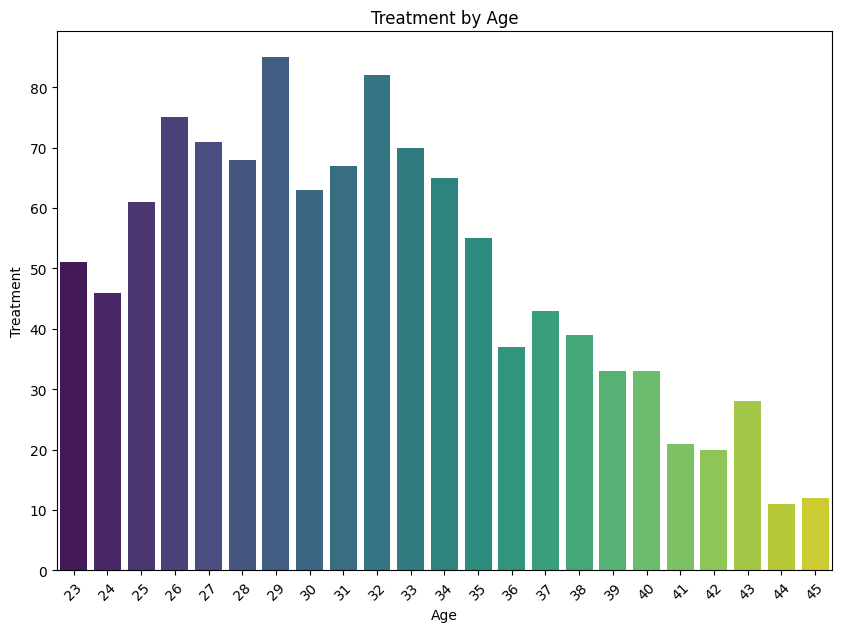

In [81]:
plt.figure(figsize=(10,7))
sns.countplot(x='Age', data=omsicc, palette='viridis')
plt.title('Treatment by Age')
plt.xlabel('Age')
plt.ylabel('Treatment')
plt.xticks(rotation=45)
plt.show()

In [82]:
def convert(val):
    val = str(val).strip().lower()
    
    if "more than" in val:
        return 1250
    elif "-" in val:
        low, high = val.split("-")
        return int((float(low) + float(high)) / 2)

def stats(omsicc, no_employee):
    omsicc[no_employee] = omsicc[no_employee].apply(convert)
    omsicc[no_employee] = omsicc[no_employee].astype(int)
    omsicc[no_employee].fillna(omsicc[no_employee].mean(), inplace=True)
    return omsicc[no_employee].mean()

In [83]:
mean= stats(omsicc, 'no_employees')
print(mean)

omsicc.head()


370.8098591549296


C:\Users\HP\AppData\Local\Temp\ipykernel_10944\631896006.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  omsicc[no_employee].fillna(omsicc[no_employee].mean(), inplace=True)


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,Unknown,No,Yes,Often,15,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,Unknown,No,No,Rarely,1250,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Unknown,No,No,Rarely,15,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,Unknown,Yes,Yes,Often,63,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,Unknown,No,No,Never,300,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2036802229.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_employees', data=omsicc, palette='viridis')


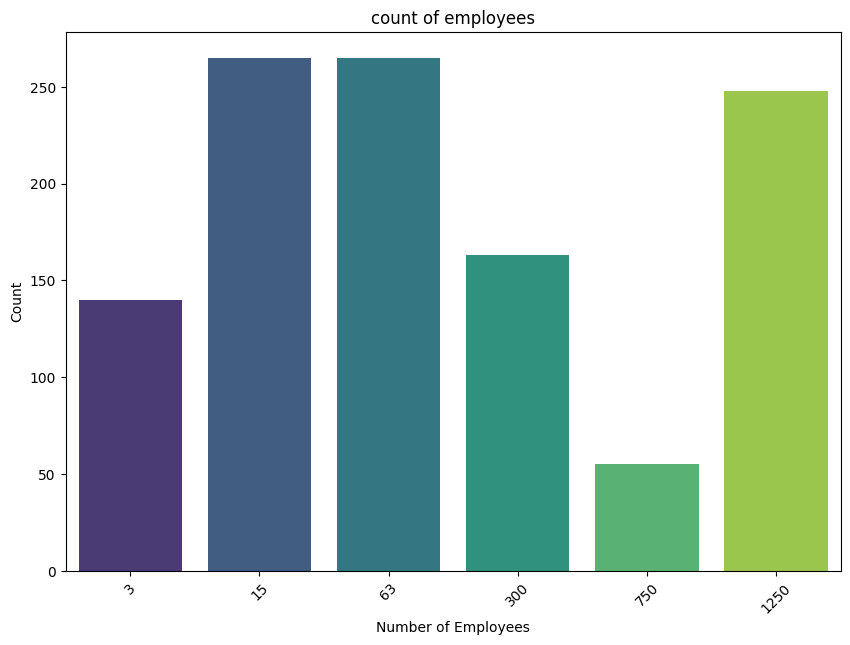

In [84]:
plt.figure(figsize=(10, 7))
sns.countplot(x='no_employees', data=omsicc, palette='viridis')
plt.title('count of employees')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [85]:
def gender(g):
    g = str(g).strip().lower()
    
    male = ['male', 'm', 'male-ish', 'maile', 'mal', 'msle', 'malr', 'cis male', 'cis-man', 'man']
    female = ['female', 'f', 'woman', 'femail', 'cis female', 'cis-female/femme', 'female (cis)']
    
    if g in male:
        return 'Male'
    elif g in female:
        return 'Female'
    else:
        return 'Other'
omsicc['Sex'] = omsicc['Gender'].apply(gender)

In [86]:
omsicc.drop('Gender', axis=1, inplace=True)
omsicc

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex
0,37,Unknown,No,Yes,Often,15,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,Unknown,No,No,Rarely,1250,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Unknown,No,No,Rarely,15,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,Unknown,Yes,Yes,Often,63,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,Unknown,No,No,Never,300,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,No,Yes,No,Rarely,1250,No,No,Don't know,No,...,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,Male
1254,26,No,No,Yes,Unknown,63,No,Yes,No,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,Male
1255,32,No,Yes,Yes,Often,63,Yes,Yes,Yes,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,Male
1256,34,No,Yes,Yes,Sometimes,1250,No,Yes,Yes,Yes,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,Male


In [87]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = [
    'self_employed', 'family_history', 'treatment', 'remote_work', 
    'tech_company', 'benefits', 'wellness_program', 'seek_help', 
    'anonymity', 'mental_vs_physical', 'obs_consequence','Sex', 'work_interfere',
    'care_options', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'phys_health_interview'
]
omsicc_encoded = omsicc.copy()
label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    omsicc_encoded[col] = le.fit_transform(omsicc_encoded[col].astype(str))
    label_encoders[col] = le  
omsicc_encoded

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex
0,37,1,0,1,1,15,0,1,2,1,...,2,1,1,1,2,1,0,2,0,0
1,44,1,0,0,2,1250,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
2,32,1,0,0,2,15,0,1,1,0,...,1,1,1,2,2,2,2,1,0,1
3,31,1,1,1,1,63,0,1,1,2,...,1,2,2,1,0,0,0,1,1,1
4,31,1,0,0,0,300,1,1,2,0,...,0,1,1,1,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,0,1,0,2,1250,0,0,0,0,...,2,0,0,1,1,1,1,0,0,1
1254,26,0,0,1,4,63,0,1,1,0,...,2,1,1,1,1,1,1,0,0,1
1255,32,0,1,1,1,63,1,1,2,2,...,1,1,1,1,2,1,1,2,0,1
1256,34,0,1,1,3,1250,0,1,2,2,...,1,2,2,0,0,1,1,1,0,1


In [88]:

omsicc_encoded['colleagues_list'] = omsicc_encoded[['coworkers', 'supervisor']].values.tolist()


omsicc_encoded['remedies_list'] = omsicc_encoded[['leave', 'care_options', 'wellness_program']].values.tolist()

omsicc_encoded['mh_discussion'] = omsicc_encoded[['mental_health_consequence', 'mental_health_interview']].values.tolist()


omsicc_encoded['ph_discussion'] = omsicc_encoded[['phys_health_consequence', 'phys_health_interview']].values.tolist()

omsicc_encoded['colleagues_count'] = omsicc_encoded['colleagues_list'].apply(len)
omsicc_encoded['remedies_count'] = omsicc_encoded['remedies_list'].apply(len)
omsicc_encoded['mh_discussion_count'] = omsicc_encoded['mh_discussion'].apply(len)
omsicc_encoded['ph_discussion_count'] = omsicc_encoded['ph_discussion'].apply(len)

omsicc_encoded

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,obs_consequence,Sex,colleagues_list,remedies_list,mh_discussion,ph_discussion,colleagues_count,remedies_count,mh_discussion_count,ph_discussion_count
0,37,1,0,1,1,15,0,1,2,1,...,0,0,"[1, 2]","[2, 1, 1]","[1, 1]","[1, 0]",2,3,2,2
1,44,1,0,0,2,1250,0,0,0,0,...,0,1,"[0, 0]","[0, 0, 0]","[0, 1]","[1, 1]",2,3,2,2
2,32,1,0,0,2,15,0,1,1,0,...,0,1,"[2, 2]","[1, 0, 1]","[1, 2]","[1, 2]",2,3,2,2
3,31,1,1,1,1,63,0,1,1,2,...,1,1,"[1, 0]","[1, 2, 1]","[2, 0]","[2, 0]",2,3,2,2
4,31,1,0,0,0,300,1,1,2,0,...,0,1,"[1, 2]","[0, 0, 0]","[1, 2]","[1, 2]",2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,0,1,0,2,1250,0,0,0,0,...,0,1,"[1, 1]","[2, 0, 2]","[0, 1]","[0, 1]",2,3,2,2
1254,26,0,0,1,4,63,0,1,1,0,...,0,1,"[1, 1]","[2, 0, 1]","[1, 1]","[1, 1]",2,3,2,2
1255,32,0,1,1,1,63,1,1,2,2,...,0,1,"[1, 2]","[1, 2, 1]","[1, 1]","[1, 1]",2,3,2,2
1256,34,0,1,1,3,1250,0,1,2,2,...,0,1,"[0, 0]","[1, 2, 1]","[2, 1]","[2, 1]",2,3,2,2


In [89]:
omsicc_encoded_1 = omsicc_encoded.drop(['colleagues_list','mh_discussion','remedies_list','ph_discussion'], axis=1)
omsicc_encoded_1

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex,colleagues_count,remedies_count,mh_discussion_count,ph_discussion_count
0,37,1,0,1,1,15,0,1,2,1,...,2,1,0,2,0,0,2,3,2,2
1,44,1,0,0,2,1250,0,0,0,0,...,0,1,1,0,0,1,2,3,2,2
2,32,1,0,0,2,15,0,1,1,0,...,2,2,2,1,0,1,2,3,2,2
3,31,1,1,1,1,63,0,1,1,2,...,0,0,0,1,1,1,2,3,2,2
4,31,1,0,0,0,300,1,1,2,0,...,2,2,2,0,0,1,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,36,0,1,0,2,1250,0,0,0,0,...,1,1,1,0,0,1,2,3,2,2
1254,26,0,0,1,4,63,0,1,1,0,...,1,1,1,0,0,1,2,3,2,2
1255,32,0,1,1,1,63,1,1,2,2,...,2,1,1,2,0,1,2,3,2,2
1256,34,0,1,1,3,1250,0,1,2,2,...,0,1,1,1,0,1,2,3,2,2


# Visualisation

C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2232774992.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=omsicc_encoded_1, x='no_employees',y='treatment', palette='pastel', ci= None)
C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2232774992.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=omsicc_encoded_1, x='no_employees',y='treatment', palette='pastel', ci= None)


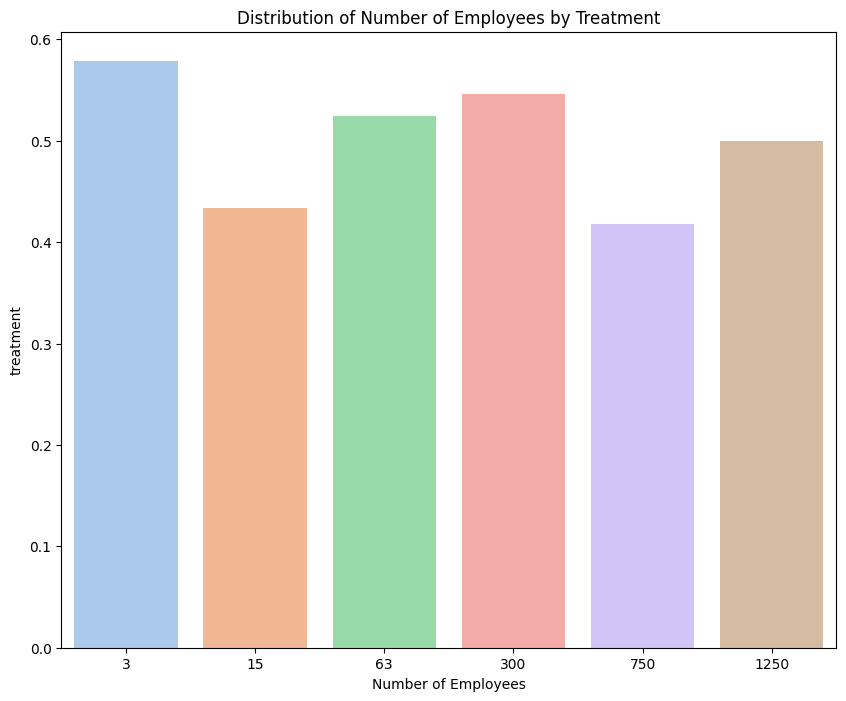

C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2232774992.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=omsicc_encoded_1, x='Age',y='treatment', palette='viridis', ci=None)
C:\Users\HP\AppData\Local\Temp\ipykernel_10944\2232774992.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=omsicc_encoded_1, x='Age',y='treatment', palette='viridis', ci=None)


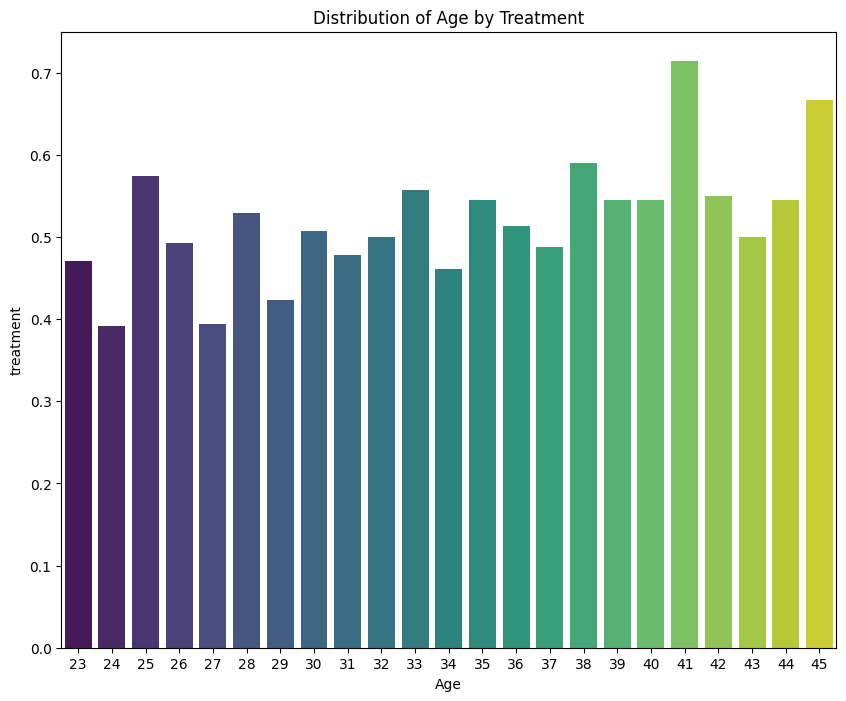

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(data=omsicc_encoded_1, x='no_employees',y='treatment', palette='pastel', ci= None)
plt.title('Distribution of Number of Employees by Treatment')
plt.xlabel('Number of Employees')
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(data=omsicc_encoded_1, x='Age',y='treatment', palette='viridis', ci=None)
plt.title('Distribution of Age by Treatment')
plt.xlabel('Age')
plt.show()

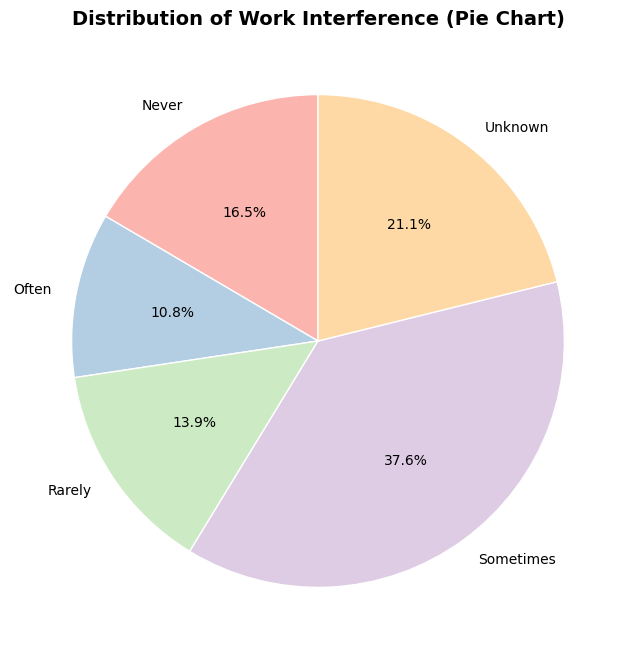

In [101]:
pie_data = omsicc.groupby('work_interfere').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Pastel1.colors  
wedges, texts, autotexts = ax.pie(
    pie_data['count'],
    labels=pie_data['work_interfere'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
ax.set_title('Distribution of Work Interference (Pie Chart)', fontsize=14, fontweight='bold')

plt.show()

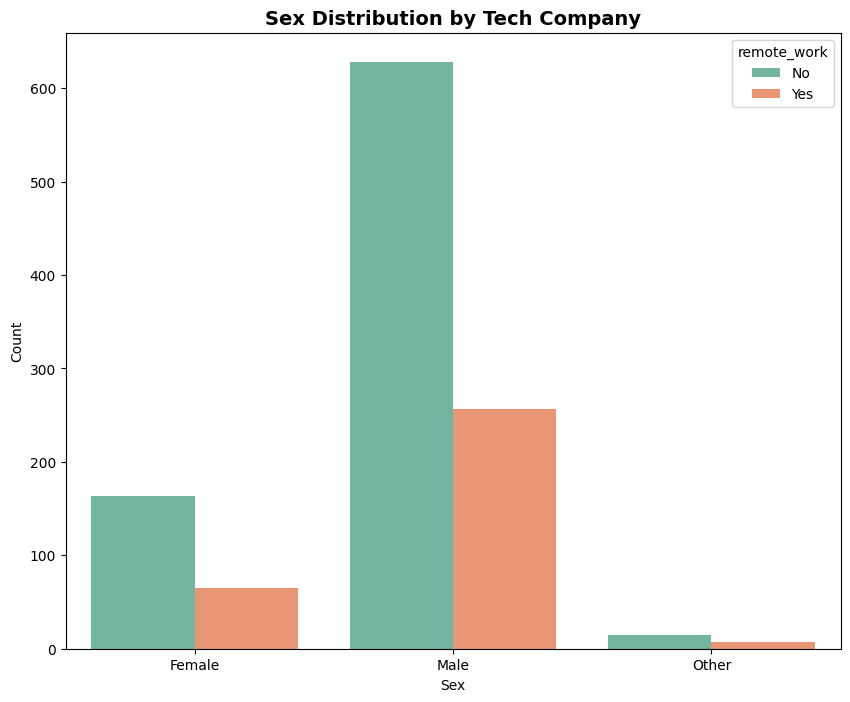

In [111]:
plt.figure(figsize=(10, 8))
sns.countplot(
    data=omsicc,
    x='Sex',
    hue='remote_work',
    palette='Set2'
)
plt.title('Sex Distribution by Tech Company', fontsize=14, fontweight='bold')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


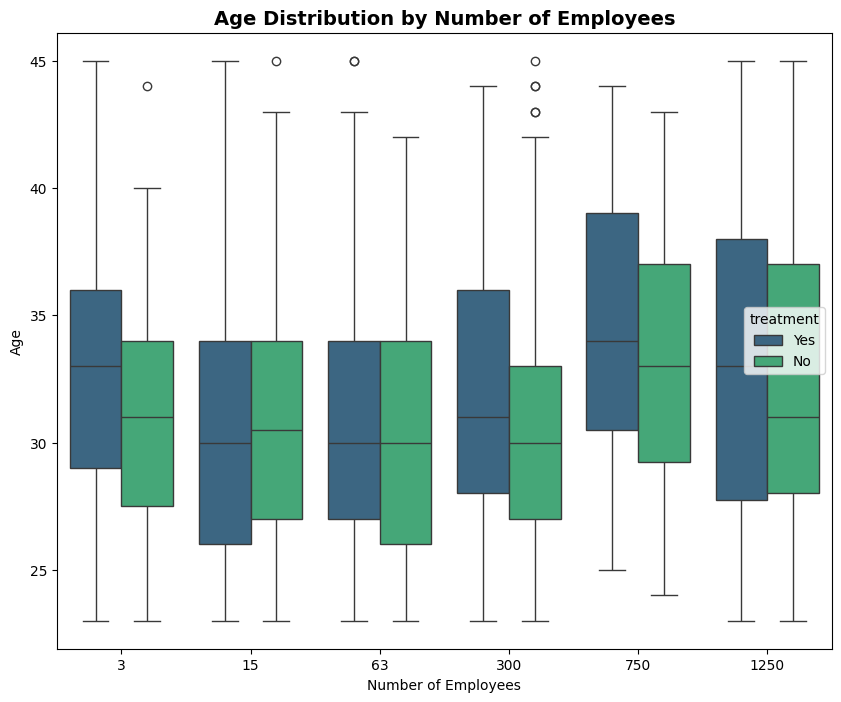

In [113]:
plt.figure(figsize=(10, 8))
sns.boxplot(
    data=omsicc,
    x='no_employees',
    y='Age',
    hue='treatment',
    palette='viridis'
)
plt.title('Age Distribution by Number of Employees', fontsize=14, fontweight='bold')
plt.xlabel('Number of Employees')
plt.ylabel('Age')
plt.show()


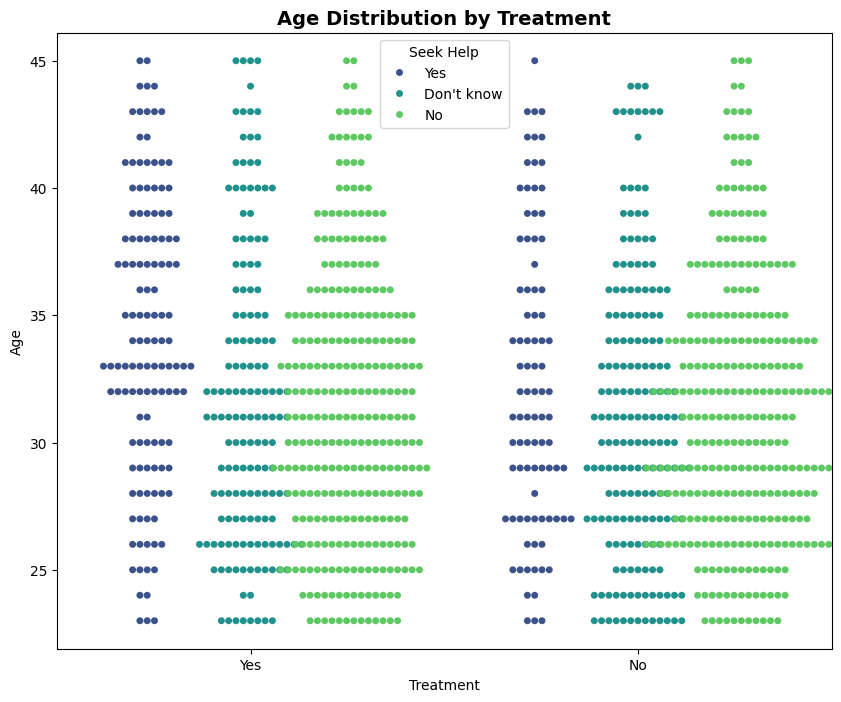

In [115]:
plt.figure(figsize=(10, 8))
sns.swarmplot(
    data=omsicc,
    x='treatment',
    y='Age',
    hue='seek_help',
    palette='viridis',
    dodge=True
)
plt.title('Age Distribution by Treatment', fontsize=14, fontweight='bold')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.legend(title='Seek Help')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10944\3588694186.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', data=omsicc_encoded_1, y='treatment', palette='pastel', hue='seek_help', ci= None)


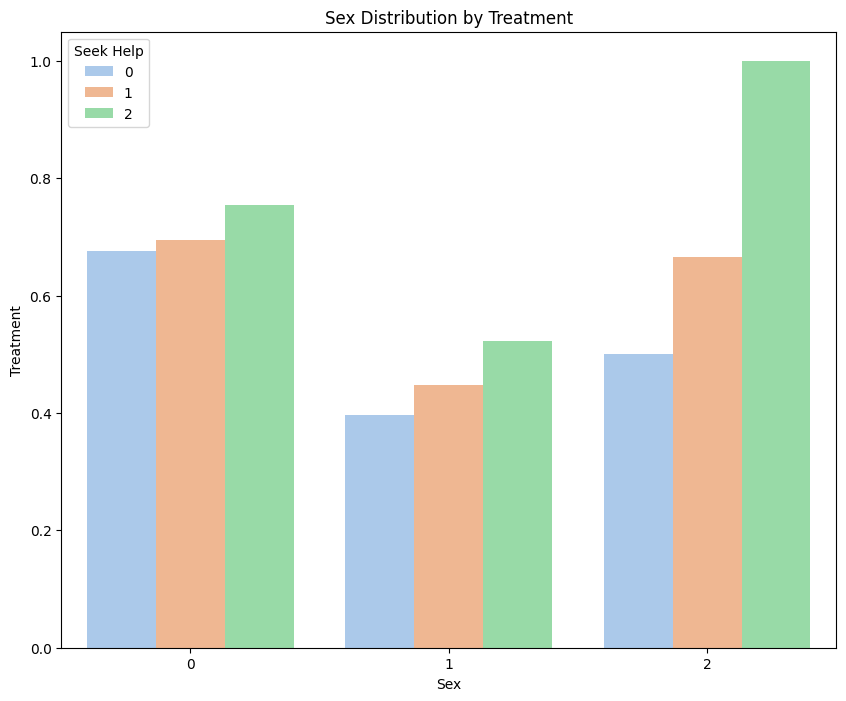

In [95]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Sex', data=omsicc_encoded_1, y='treatment', palette='pastel', hue='seek_help', ci= None)
plt.title('Sex Distribution by Treatment')
plt.legend(title='Seek Help')
plt.xlabel('Sex')
plt.ylabel('Treatment')
plt.show()

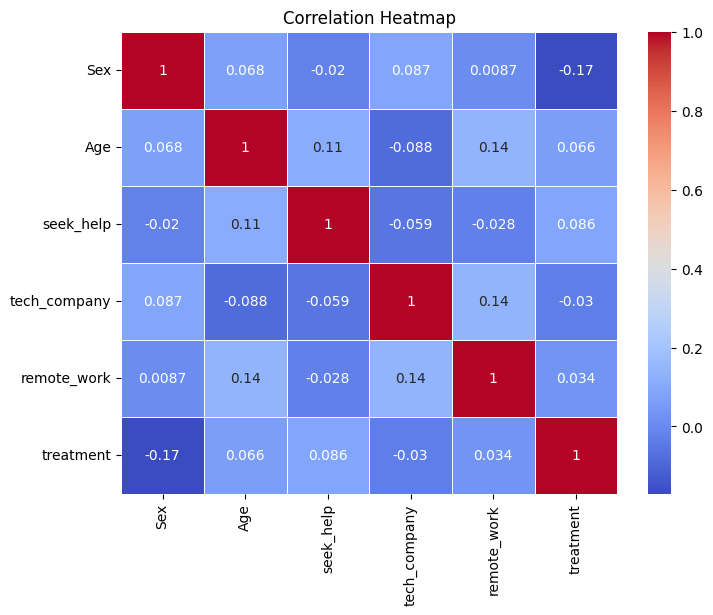

In [ ]:
omsicc_encoded_2 = omsicc_encoded_1.copy()
omsicc_encoded_2 = pd.DataFrame({
   'Sex': omsicc_encoded_1['Sex'],
   'Age': omsicc_encoded_1['Age'],
   'seek_help': omsicc_encoded_1['seek_help'],
   'tech_company': omsicc_encoded_1['tech_company'],
   'remote_work': omsicc_encoded_1['remote_work'],
   'treatment': omsicc_encoded_1['treatment']
})

corr_matrix = omsicc_encoded_2.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [97]:
omsicc.to_csv('omsicc.csv', index =False)
omsicc_encoded_1.to_csv('omsicc_encoded_1.csv', index=False)